In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
final_rank_load = "final_rank_by_zip.csv"
final_rank = pd.read_csv(final_rank_load)

In [3]:
crime_load = "2016 Austin crime data - clean.csv"
crime_df = pd.read_csv(crime_load)

In [4]:
crime_clean_df = crime_df[['Highest Offense Description', 'Zip Code']]

In [5]:
total_crime_count = crime_clean_df.groupby('Zip Code').count()
new_name= total_crime_count.rename(columns={"Highest Offense Description": "Crime Count"})

In [6]:
blended_rank_and_crime = pd.merge(final_rank, new_name, how="left", on=["Zip Code", "Zip Code"])
sorted_df= blended_rank_and_crime.sort_values(by='Total Score', ascending=True)
final_df = sorted_df.reset_index(drop = True)
final_df.head()

,Zip Code,Total Score,Total Population (18+),Crime Count
0,78721,3.0625,9363,2102
1,78741,3.5000,42237,9725
2,78705,3.7500,31595,2521
3,78744,4.6250,32628,6403
4,78752,5.4375,14975,3536


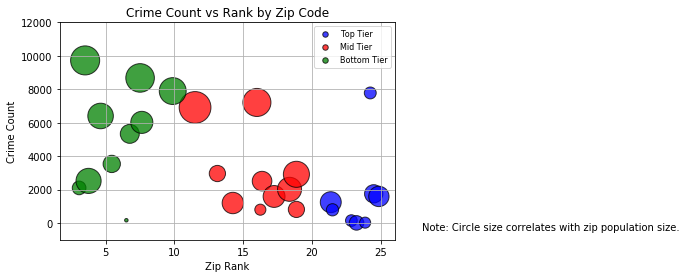

In [18]:
top_third = final_df.loc[final_df['Total Score'] > 20]
x_top = top_third['Total Score']
y_top = top_third['Crime Count']
s_top = top_third["Total Population (18+)"]
middle_third = final_df.loc[(final_df['Total Score'] <= 20)&(final_df['Total Score'] > 10)]
x_mid = middle_third['Total Score']
y_mid = middle_third['Crime Count']
s_mid = middle_third["Total Population (18+)"]
bottom_third = final_df.loc[final_df['Total Score'] <= 10]
x_bottom = bottom_third['Total Score']
y_bottom = bottom_third['Crime Count']
s_bottom = bottom_third["Total Population (18+)"]
top = plt.scatter(x_top, y_top, marker="o", facecolors='blue', s=s_top*.02, edgecolors="black",alpha= .75, label="Top Tier", linewidths = 1)
mid = plt.scatter(x_mid, y_mid, marker="o", facecolors="red", s=s_mid*.02, edgecolors="black",alpha=.75, label="Mid Tier", linewidths = 1)
bottom = plt.scatter(x_bottom, y_bottom, marker="o", facecolors="green", s=s_bottom*.02, edgecolors="black",alpha=.75, label = "Bottom Tier", linewidths = 1)
plt.title("Crime Count vs Rank by Zip Code")
plt.xlabel("Zip Rank")
plt.ylabel("Crime Count")
plt.grid()
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=8)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.text(28, 35, "Note: Circle size correlates with zip population size.", fontsize=10,
         va='top',wrap = True)
plt.ylim(-1000, 12000)
plt.savefig("Images/Scatter_by_Zip.png", bbox_inches='tight')
plt.show()